# TRABALHO PRÁTICO 2 - IBD

### Grupo:
*   Eduardo Correia
*   Allan Dayrell
*   Bruno Silva
*   Lucas Araújo de Macedo
*   Karen Moura



## Fontes:

* https://dados.pbh.gov.br/dataset/familias-de-baixa-renda-no-cras

* https://dados.pbh.gov.br/dataset/familias-no-cadastro-unico

## Data de obtenção dos dados:

* 14 de abril de 2021, 14:18 (UTC-03:00) (link 1).
* 23 de novembro de 2023, 13:15 (UTC-03:00) (link 2).

## Órgão produtor:

* Prefeitura de Belo Horizonte.

## Data de referência:

* 23 de outubro de 2023, 09:48 (UTC-03:00) (link 1).
* 14 de abril de 2021, 14:29 (UTC-03:00) (link 2).

## Limitações registradas:

* Pesquisa limitada apenas à região de Belo Horizonte.

## Cobertura geográfica de referência:

* Cidade de Belo Horizonte.

In [ ]:
#NÃO ALTERE AS LINHAS ABAIXO
import sys
#!{sys.executable} -m pip install sqlite3
!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install csv
!{sys.executable} -m pip install gdown

In [ ]:
#NÃO ALTERE AS LINHAS ABAIXO
import sqlite3 as sql3
import pandas as pd
import csv
import gdown

In [ ]:
#NÃO ALTERE AS LINHAS ABAIXO
!gdown "1y6ZQgR71_IlZqjVUZLJPn1szzWdIXYFx"
# https://drive.google.com/file/d/1y6ZQgR71_IlZqjVUZLJPn1szzWdIXYFx/view?usp=drive_link

Downloading...
From: https://drive.google.com/uc?id=1y6ZQgR71_IlZqjVUZLJPn1szzWdIXYFx
To: /content/cras_e_cad_unico.sql
100% 34.9M/34.9M [00:00<00:00, 63.4MB/s]


In [ ]:
#NÃO ALTERE AS LINHAS ABAIXO
con = sql3.connect(":memory:")
sql_file = open('cras_e_cad_unico.sql', encoding="utf8")
cur = con.cursor()
db = sql_file.read()
cur.executescript(db)
con.commit()

## Estrutura das Tabelas do Banco de Dados

### TABELA CRAS

In [ ]:
#NÃO ALTERE AS LINHAS ABAIXO
query = "PRAGMA table_info('cras')"
df = pd.read_sql(query, con)
display(df)

,cid,name,type,notnull,dflt_value,pk
0,0,REGIONAL,TEXT,0,None,0
1,1,CRAS,TEXT,0,None,0
2,2,QTDE_FAMILIAS,INTEGER,0,None,0
3,3,MES_ANO_REFERENCIA,TEXT,0,None,0


### TABELA CADUNICO

In [ ]:
#NÃO ALTERE AS LINHAS ABAIXO
query = "PRAGMA table_info('cadunico')"
df = pd.read_sql(query, con)
display(df)

,cid,name,type,notnull,dflt_value,pk
0,0,DATA_ATUALIZACAO_FAMILIA,TEXT,0,None,0
1,1,BOLSA_FAMILIA,TEXT,0,None,0
2,2,FAIXA_RENDA_FAMILIAR_PER_CAPITA,TEXT,0,None,0
3,3,CRAS,TEXT,0,None,0
4,4,REGIONAL,TEXT,0,None,0
5,5,FAIXA_DESATUALICACAO_CADASTRAL,TEXT,0,None,0
6,6,MES_ANO_REFERENCIA,TEXT,0,None,0


## Função de Consulta
A função abaixo executa a consulta, exibe o retorno da consulta no banco e grava os dados necessários no arquivo resultado.

In [ ]:
#NÃO ALTERE AS LINHAS ABAIXO
def runQuery(query, query_name):
  df = pd.read_sql(query, con)
  query_size = df.shape[0]
  display(df)

## Preparação dos dados

Com relação a preparação e limpeza dos dados, foram criadas métricas e filtros para garantir que não houvessem dados duplicados e que estes estivessem dispostos de maneira padronizada. Uma observação que pode ser feita é que quando foi feita a prescrição dos dados, foram utilizados caracteres que não são identificados como em “Endere�o FORA de Territ�rio TPSA”, e um erro de grafia no nome de uma das colunas (FAIXA_DESATUALICACAO_CADASTRAL), mas em ambos os casos não se trata de nada significante.

## Definição dos objetivos:

>  Identificar o número total de famílias que recebem o benefício do Bolsa Família;

>  Determinar o número total de pessoas cadastradas no CadÚnico;

>  Contar o número total de Centros de Referência de Assistência Social (CRAS) distintos presentes no banco de dados;

> Contar quantos endereços no CadÚnico não possuem informações de georreferenciamento;

>  Analisar a distribuição dos CRAS em diferentes regionais de Belo Horizonte;

> Verificar como a quantidade de pessoas cadastradas no CadÚnico está distribuída nas diferentes regionais da cidade;

> Analisar a distribuição de famílias com base nas faixas de renda familiar per capita no CadÚnico;

> Identificar e contar quantas famílias possuem desatualização cadastral no CadÚnico.















## Análise descritiva:

### Quantas famílias recebem bolsa família:

In [ ]:
q1 = "SELECT COUNT(*) AS qtd_bolsa_familia FROM cadunico WHERE BOLSA_FAMILIA = 'SIM';"
runQuery(q1, "q1")

,qtd_bolsa_familia
0,137952


### Quantas pessoas estão cadastradas no CadÚnico:

In [ ]:
q1 = "SELECT SUM(QTDE_FAMILIAS) FROM cras;"
runQuery(q1, "q1")

,SUM(QTDE_FAMILIAS)
0,295119


### Quantidade de cras distintos no banco de daods:

In [ ]:
q1 = "SELECT COUNT(DISTINCT cras) AS cras_distintos FROM cadunico"
runQuery(q1, "q1")

,cras_distintos
0,163


### Quantos endereços não são georreferenciados:

In [ ]:
q1 = "SELECT COUNT(cras) AS ENDERECO_NAO_GEORREFERENCIADO FROM cadunico c WHERE c.cras= 'ENDERECO NAO GEORREFERENCIADO'"
runQuery(q1, "q1")

,ENDERECO_NAO_GEORREFERENCIADO
0,15541


### Quantas pessoas cadastradas por regional:

In [ ]:
q1 = "SELECT REGIONAL, COUNT(QTDE_FAMILIAS) FROM cras GROUP BY REGIONAL"
runQuery(q1, "q1")

,REGIONAL,COUNT(QTDE_FAMILIAS)
0,BARREIRO,20
1,CENTRO-SUL,24
2,Endereco FORA Region,1
3,LESTE,20
4,NORDESTE,23
5,NOROESTE,23
6,NORTE,15
7,OESTE,21
8,PAMPULHA,18
9,VENDA NOVA,18


### Quantos cras existem por regional:

In [ ]:
q1 = "SELECT REGIONAL, COUNT(*) AS qtd_cras FROM cras GROUP BY REGIONAL"
runQuery(q1, "q1")

,REGIONAL,qtd_cras
0,BARREIRO,20
1,CENTRO-SUL,24
2,Endereco FORA Region,1
3,LESTE,20
4,NORDESTE,23
5,NOROESTE,23
6,NORTE,15
7,OESTE,21
8,PAMPULHA,18
9,VENDA NOVA,18


### Quantas pessoas cadastradas no CadÚnico por regional:

In [ ]:
q1 = "SELECT REGIONAL, COUNT(*) AS qtd_pessoas FROM cadunico GROUP BY REGIONAL"
runQuery(q1, "q1")

,REGIONAL,qtd_pessoas
0,BARREIRO,41566
1,CENTRO SUL,25382
2,ENDERECO NAO GEORREFERENCIADO,10878
3,Endereco FORA Region,6
4,LESTE,30056
5,NORDESTE,36528
6,NOROESTE,30091
7,NORTE,44117
8,OESTE,30786
9,PAMPULHA,24390


### Quantas familias tem a faixa de renda familiar per capta

> Até RS109.00

> RS109.01 até RS218.00

> RS218.01 até 0.5 Salário Mínimo

>  Acima de 0.5 Salário Mínimo


In [ ]:
q1 = "SELECT FAIXA_RENDA_FAMILIAR_PER_CAPITA, COUNT(*) AS qtd_familias FROM cadunico GROUP BY FAIXA_RENDA_FAMILIAR_PER_CAPITA"
runQuery(q1, "q1")

,FAIXA_RENDA_FAMILIAR_PER_CAPITA,qtd_familias
0,Acima de 0.5 Salario Minimo,103850
1,Ate R$109.00,120473
2,Entre R$109.01 ate R$218.00,22517
3,Entre R$218.01 ate 0.5 Salario Minimo,63820


from matplotlib import pyplot as plt
_df_0['qtd_familias'].plot(kind='hist', bins=20, title='qtd_familias')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('FAIXA_RENDA_FAMILIAR_PER_CAPITA').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['qtd_familias'].plot(kind='line', figsize=(8, 4), title='qtd_familias')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['FAIXA_RENDA_FAMILIAR_PER_CAPITA'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='qtd_familias', y='FAIXA_RENDA_FAMILIAR_PER_CAPITA', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Quantas familias tem a faixa de desatualização cadastral de

> até 12 Meses

> 13 à 18 Meses

> 19 à 24 Meses

> 25 à 36 Meses

> 37 à 48 Meses

> acima de 48 Meses


In [ ]:
q1 = "SELECT FAIXA_DESATUALICACAO_CADASTRAL, COUNT(*) AS qtd_familias FROM cadunico GROUP BY FAIXA_DESATUALICACAO_CADASTRAL"
runQuery(q1, "q1")

,FAIXA_DESATUALICACAO_CADASTRAL,qtd_familias
0,13 a 18 Meses,57681
1,19 a 24 Meses,34764
2,25 a 36 Meses,22091
3,37 a 48 Meses,17050
4,acima de 48 Meses,24497
5,ate 12 Meses,154577


## Quantidade de pessoas com renda per capta até RS109.00

In [ ]:
q1 = "SELECT REGIONAL, COUNT(*) AS qtd_pessoas FROM cadunico WHERE FAIXA_RENDA_FAMILIAR_PER_CAPITA = 'Ate R$109.00' GROUP BY REGIONAL;"
runQuery(q1, "q1")

,REGIONAL,qtd_pessoas
0,BARREIRO,15207
1,CENTRO SUL,11490
2,ENDERECO NAO GEORREFERENCIADO,4806
3,Endereco FORA Region,2
4,LESTE,12604
5,NORDESTE,13394
6,NOROESTE,11069
7,NORTE,20351
8,OESTE,10685
9,PAMPULHA,7122


## Identificação de valores discrepantes

Com base em nossa análise, constatamos que os dados pertinentes a este tópico envolvem a faixa de renda familiar per capita e a faixa de desatualização cadastral. Nesse contexto, observamos que não foram identificados valores críticos que se distanciem de maneira significativa do padrão geral dos dados.

#### Gráfico de faixa de desatualização


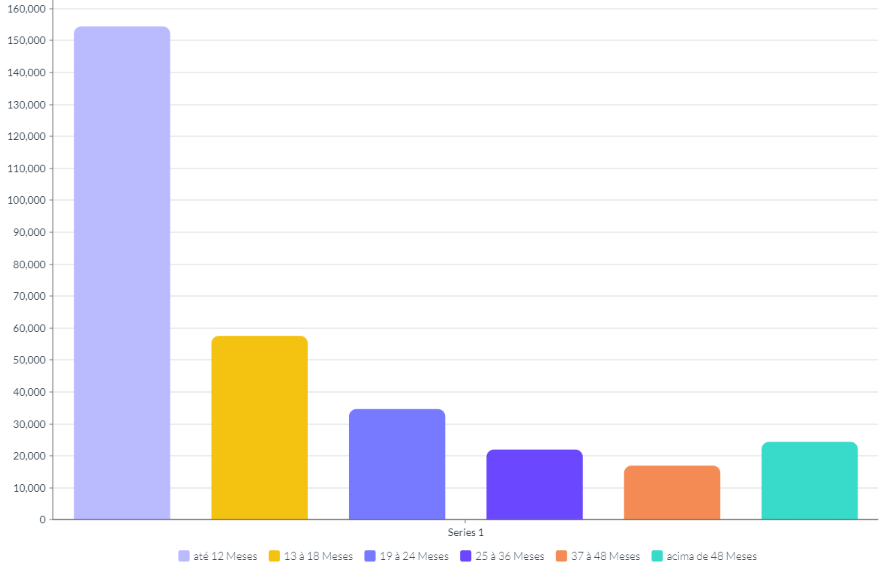

#### Gráfico de faixa de renda per capta

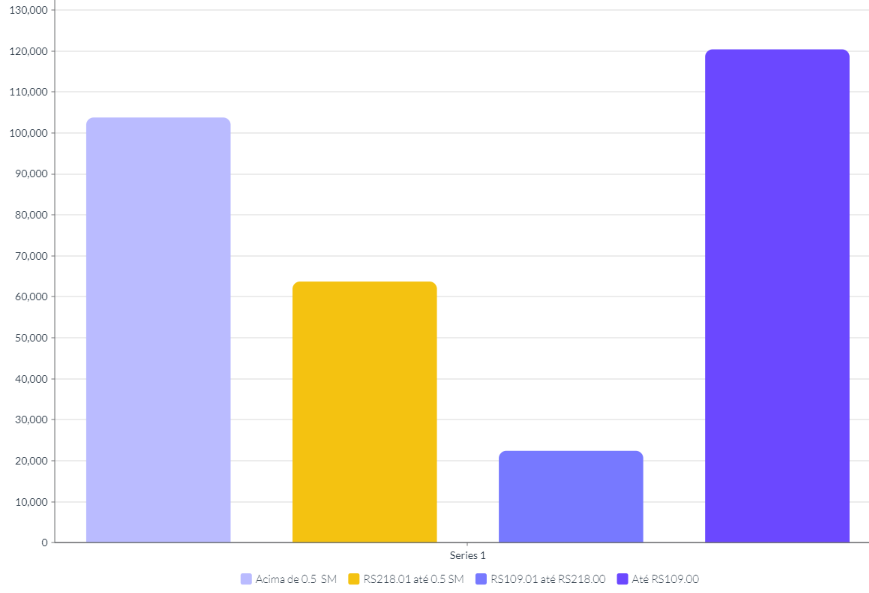

## Análise de correlação

 ### Quantidade de Famílias que Recebem Bolsa Família vs. Quantidade de Pessoas Cadastradas





A quantidade de famílias que recebem o Bolsa Família pode estar positivamente correlacionada com a quantidade de pessoas cadastradas no CadÚnico. Essa associação positiva sugere que, à medida que o número de famílias beneficiárias do Bolsa Família aumenta, é esperado que o número total de pessoas cadastradas no CadÚnico também aumente. Isso pode ocorrer porque o CadÚnico é utilizado para identificar e registrar informações sobre famílias que podem se beneficiar de programas sociais, como o Bolsa Família.

### Quantidade de CRAS por regional vs. Quantidade de pessoas por regional

Ao observar a correlação positiva entre a quantidade de Centros de Referência de Assistência Social (CRAS) e a quantidade de pessoas em uma regional, podemos inferir que há uma possível relação entre a infraestrutura de assistência social e a densidade populacional. Em regiões onde há um aumento no número de CRAS, isso pode indicar um esforço para atender às necessidades de uma população mais numerosa. Esse fenômeno pode ser influenciado por vários fatores interligados.

### Quantidade de pessoas com renda per capta até 109 reais por regional vs. Quantidade de CRAS por regional

Uma correlação positiva sugere que, à medida que a quantidade de pessoas com renda per capita até 109 reais aumenta em uma regional, é esperado que a quantidade de CRAS também aumente nessa mesma regional. Isso pode refletir uma estratégia de distribuição de Centros de Referência de Assistência Social (CRAS) para atender às necessidades de áreas com uma maior concentração de pessoas em situação de vulnerabilidade socioeconômica.

## Conclusões

Analisando os dados obtidos, foi possível observarmos uma série de fatores que só puderam ser notados graças às consultas e suas correlações, como por exemplo, a quantidade de pessoas que utilizam de serviços sociais como o CRAS e a bolsa família sendo cada vez maiores quando se trata de bairros mais populosos e compostos por pessoas de baixa renda, sendo nestes bairros também onde se possuem o maior número de unidades de atendimento e sendo na prática os locais com maior uso do serviço. Outro fator interessante de se notar é a quantidade de endereços não georreferenciados, ainda mesmo nos dias atuais, o que demonstra ser um serviço que não recebe o investimento e a atenção necessárias, levando em conta o grande volume de pessoas que dependem deste tipo de atendimento.

Logo, este tipo de analise é importante pois ajuda a ter clareza sobre quais áreas mais necessitam de serviços deste tipo e onde priorizar as atenções para futuras tomadas de decisão, ainda mais neste tópico, em específico, pois se trata de uma questão pouco discutida atualmente, mas que faz muita diferença, principalmente para setores mais carentes da população.
